## Flight Price Prediction

**Problem Statement:**

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

* Size of training set: 10683 records
* Size of test set: 2671 records

**FEATURES:**

* Airline: The name of the airline.
* Date_of_Journey: The date of the journey
* Source: The source from which the service begins.
* Destination: The destination where the service ends.
* Route: The route taken by the flight to reach the destination.
* Dep_Time: The time when the journey starts from the source.
* Arrival_Time: Time of arrival at the destination.
* Duration: Total duration of the flight.
* Total_Stops: Total stops between the source and destination.
* Additional_Info: Additional information about the flight
* Price: The price of the ticket

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

Importing datasets:

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing train dataset
df = pd.read_excel(r"C:\Users\user\Desktop\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx") #Reading excel file
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#importing test dataset
df1 = pd.read_excel(r"C:\Users\user\Desktop\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.xlsx") #Reading excel file
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


**i) Train dataset:**

In [4]:
#Checking shape of my dataset
df.shape

(10683, 11)

In [5]:
#Checking all column names
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
#Checking the data types of all columns
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

* Except for Price all other columns have object data type .
* Need to convert date of journey, dep_time and arrival_time columns from object to datetime data type.

In [7]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


* There are 10683 rows and 11 columns in the dataset.
* There are null values present in Total_Stops and Route columns.

In [8]:
#Replacing null values with there mode as those two columns are categorical
df["Route"] = df["Route"].fillna(df["Route"].mode()[0])
df["Total_Stops"] = df["Total_Stops"].fillna(df["Total_Stops"].mode()[0])

In [9]:
#Checking null values again
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Null values have been replaced by the mode of the columns as they are categorical values.

In [10]:
#Checking unique values of each column
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [11]:
#to check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
****************************************
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019    

**Feature Extraction:**

In [12]:
# to Convert object data type to datetime 
df['Date_of_Journey'] =  pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] =  pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] =  pd.to_datetime(df['Arrival_Time'])

In [13]:
# to Check the data types of all columns after converting
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
# to Extract journey year,month and day from Date_of_journey

# to Extract year
df["Journey_Year"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.year

# to Extract month
df["Journey_Month"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

# to Extract day
df["Journey_Day"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [15]:
# to Drop Date_of_journey column after extraction
df = df.drop(["Date_of_Journey"],axis=1)

The Duration column is the difference between Arrival_time and Dep_time.However, the Duration column is not in format (i.e.,-h-m) so let's extract proper duration column from the Arrival_time and Dep_time.

In [16]:
# to Extract Duration column using Arrival_Time and Dep_Time
Difference = (df["Arrival_Time"]-df["Dep_Time"])
Difference_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600
    Difference_list.append(duration)
df["Duration"] = Difference_list

In [17]:
# to Extract hours and minutes from Dep_time

# to Extract Hours
df["Dep_Hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour

# to Extract mintues
df["Dep_Min"]=pd.to_datetime(df["Dep_Time"]).dt.minute

In [18]:
# to Drop Dep_Time column after extraction
df = df.drop(["Dep_Time"],axis=1)

In [19]:
# to Extract hours and minutes from Arrival_Time

# to Extract Hours
df["Arrival_Hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour

# to Extract mintues
df["Arrival_Min"]=pd.to_datetime(df["Arrival_Time"]).dt.minute

In [20]:
# to Drop Arrival_Time column after extraction
df = df.drop(["Arrival_Time"],axis=1)

In [21]:
# to check dataset after extraction
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2.833333,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.000000,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.416667,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4.750000,1 stop,No info,13302,2019,1,3,16,50,21,35


In [22]:
# to check the value counts now
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
****************************************
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
****************************************
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
****************************************
DEL → BOM → COK                2377
BLR → DEL                      1552
CCU → BOM → BLR      

Journey_Year column has only one entry i.e, 2019, since all the samples are of same year.It will not contribute to our model, so can drop this column.

In [23]:
# to Drop unnecessary column
df = df.drop(["Journey_Year"],axis=1)

    By observing value count of categorical columns, i can do grouping as follows.

In [24]:
# to Group Airlines column
df["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)

df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

df["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [25]:
# to Group Destination column
df["Destination"].replace("New Delhi","Delhi",inplace=True)

In [26]:
# to Group Additional_Info column
df["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)

df["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)

df["Additional_Info"].replace("No Info","No info",inplace=True)

In [27]:
 # to assign values for Total_Stops column
df.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace = True)

In [28]:
# to check dataset
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,2.833333,0,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.000000,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.416667,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4.750000,1,No info,13302,1,3,16,50,21,35


In [29]:
# to Check statistical information of data set
df.describe()

,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,8.206754,0.824207,9087.064121,5.534775,12.682205,12.490686,24.411214,13.348778,24.690630
std,6.387288,0.675199,4611.359167,2.987489,8.803701,5.748650,18.767980,6.859125,16.506036
min,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,2.750000,0.000000,5277.000000,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000
50%,6.333333,1.000000,8372.000000,5.000000,6.000000,11.000000,25.000000,14.000000,25.000000
75%,12.583333,1.000000,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000
max,23.916667,4.000000,79512.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000


Above is the statistics about the dataset.The mean and the 2nd quantile values are not same so there is extreme outliers in the dataset.

**Visualization:**

In [30]:
# to check for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [31]:
# to check for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Duration', 'Total_Stops', 'Price', 'Journey_Month', 'Journey_Day', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


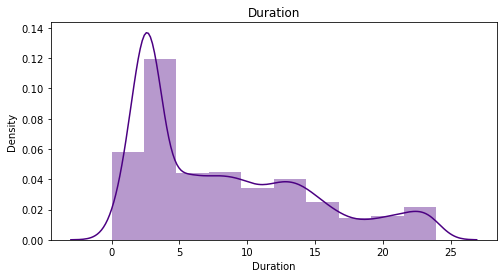

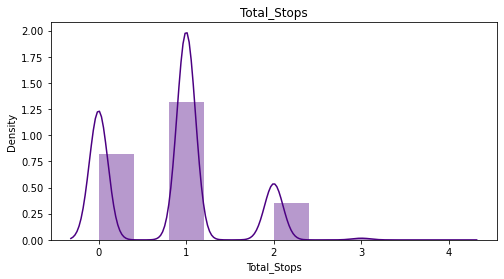

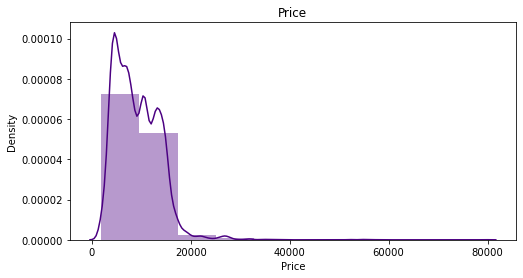

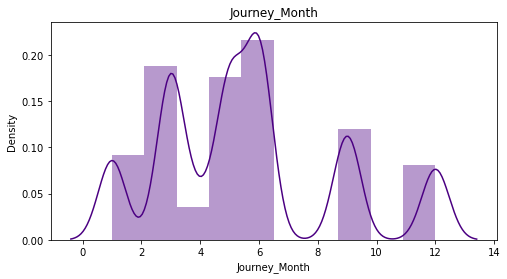

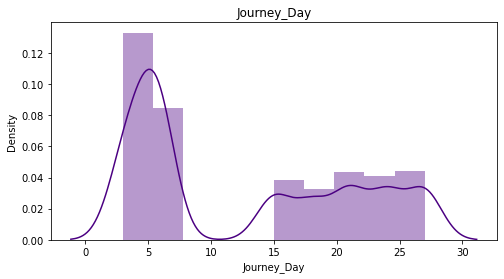

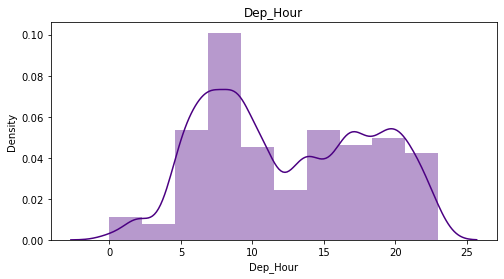

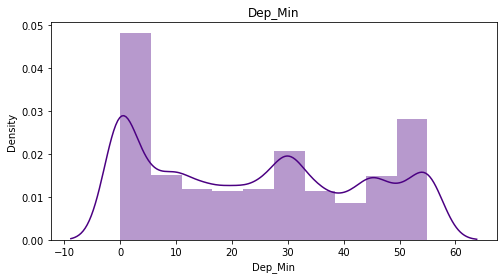

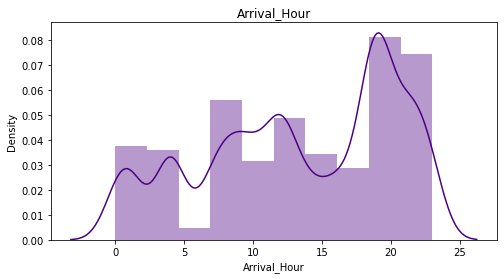

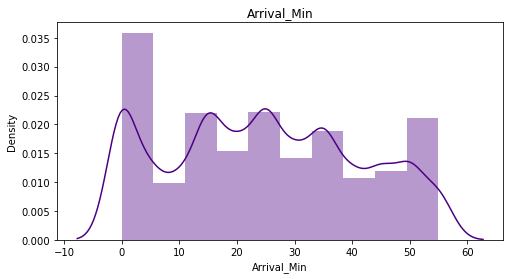

In [32]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="indigo")
    plt.title(i)
    plt.show()

skewness is present in almost all the columns.

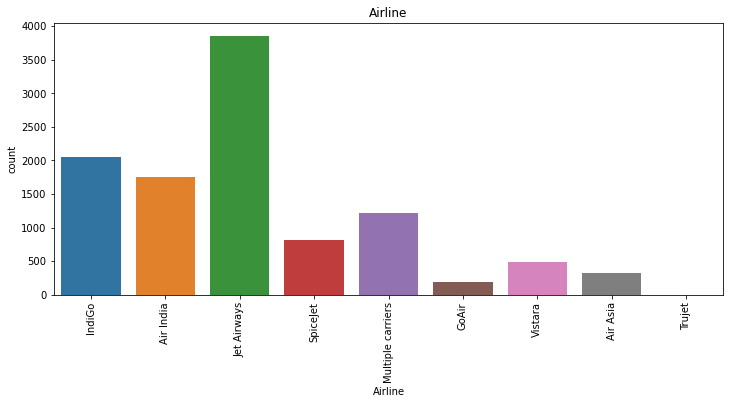

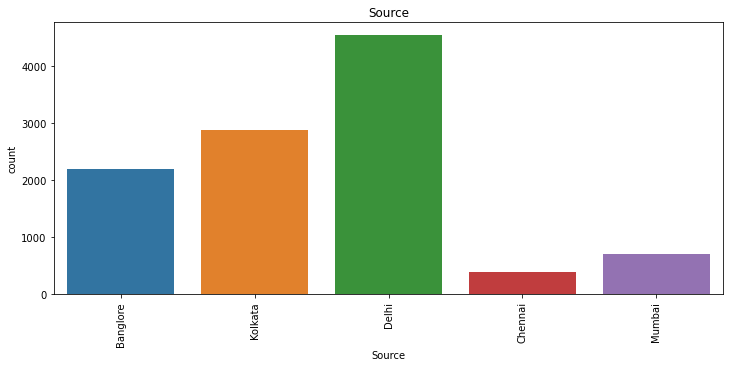

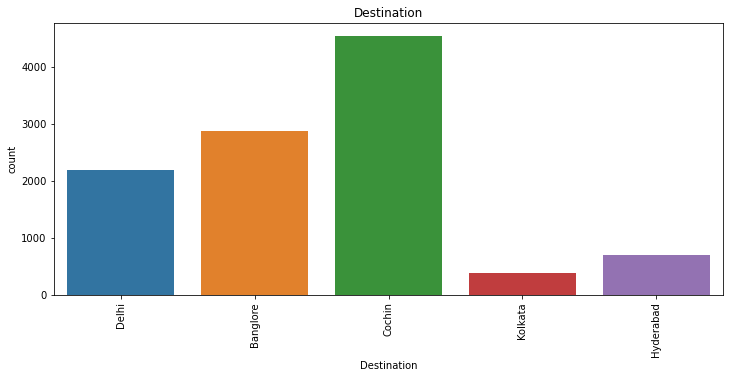

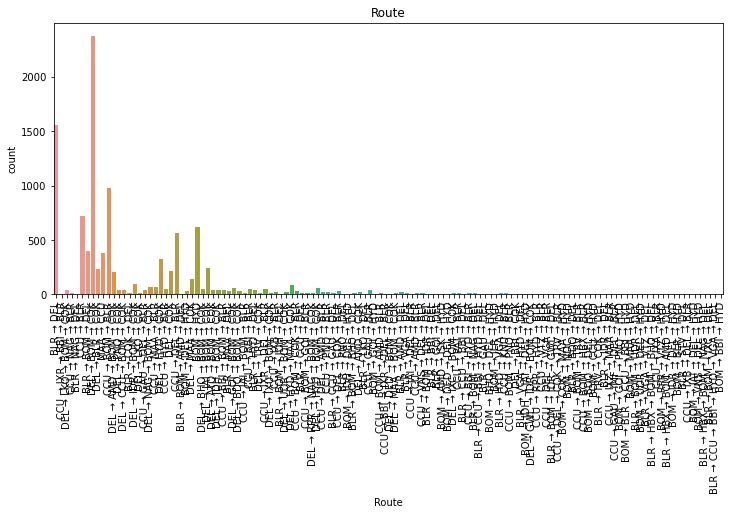

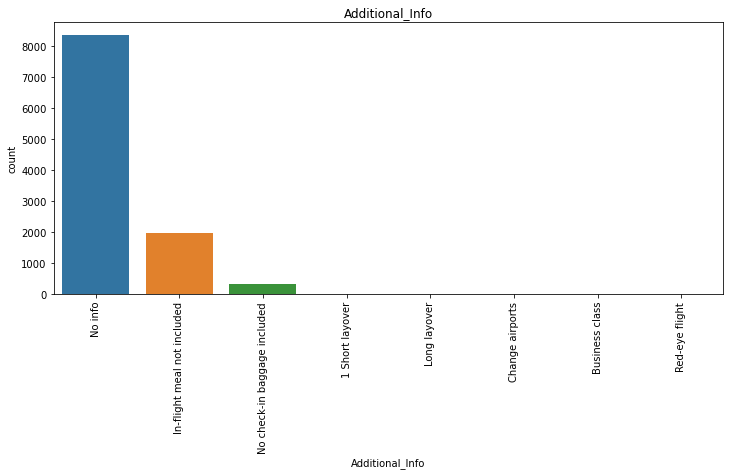

In [33]:
#Distribution plot for all categorical_columns
for i in df[categorical_columns]:              
    plt.figure(figsize = (12, 5))
    sns.countplot(x= df[i], data= df)
    plt.title(i)
    plt.xticks(rotation=90);
    plt.show()

* Jet Airways was most preferred airways where as GoAir and Tirujet is least preferred airways.
* Most number of flights orignated from Delhi where as Chennai has least number of flights.
* Most number of people travelled to Cochin whereas few number of people travelled to Kolkata.

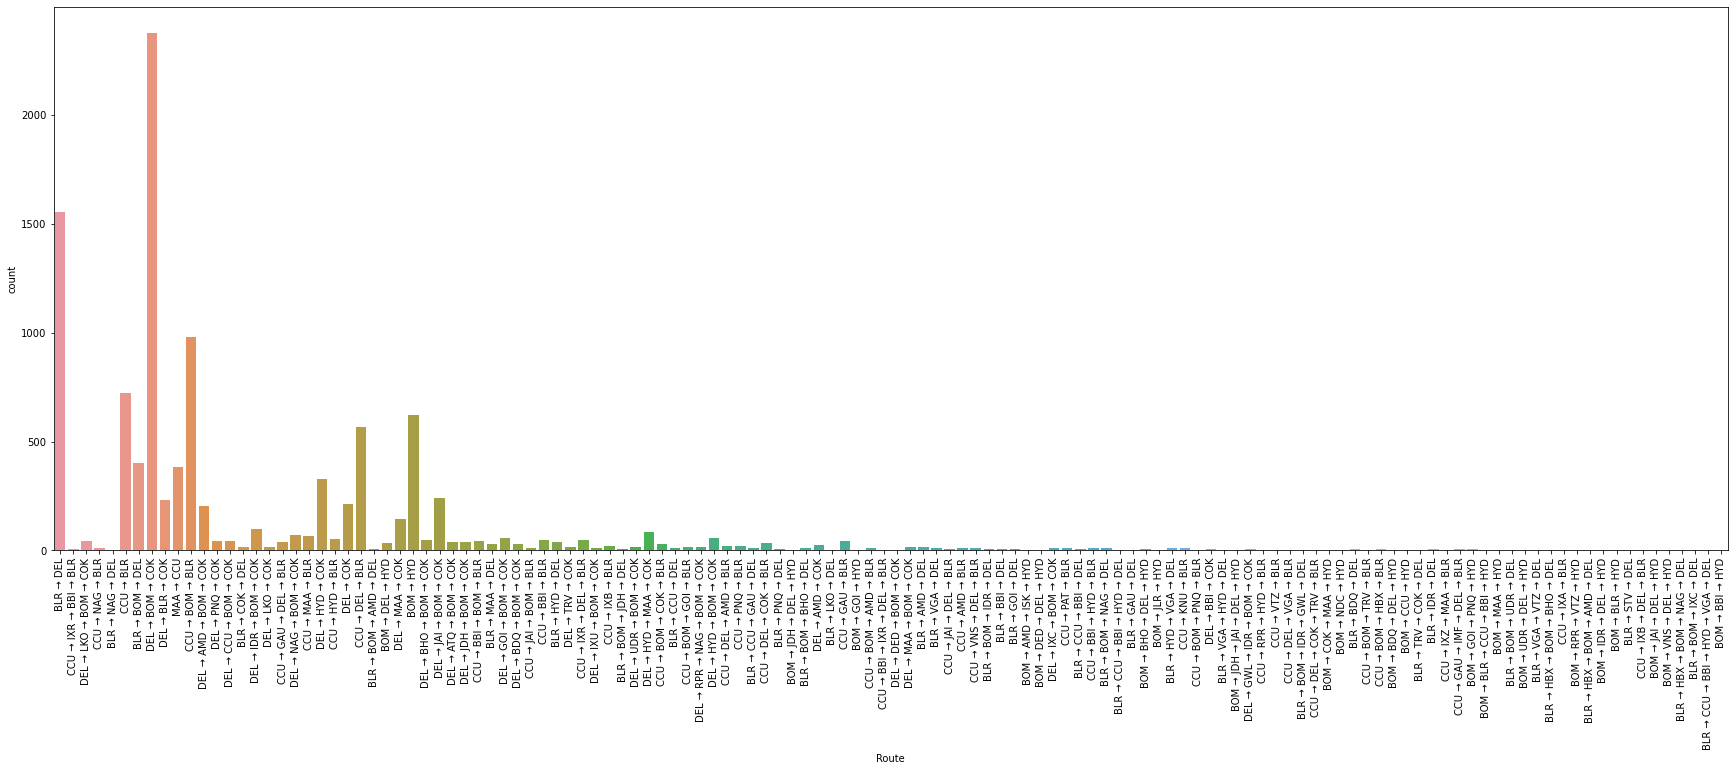

In [34]:
#Count plot for Route column
plt.figure(figsize=[30,10])
sns.countplot(df['Route'])
plt.xticks(rotation=90);

Maximum people has choosen DEL->BOM->COK as there route.

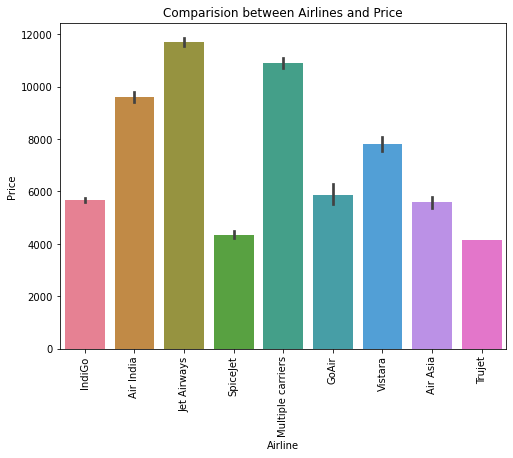

In [40]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Airlines and Price')
sns.barplot(df['Airline'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

In Air India, Multiple carriers and Jet Airways the price is high they look costly.Trujet and Spicejet are cheaper compared to other airlines.

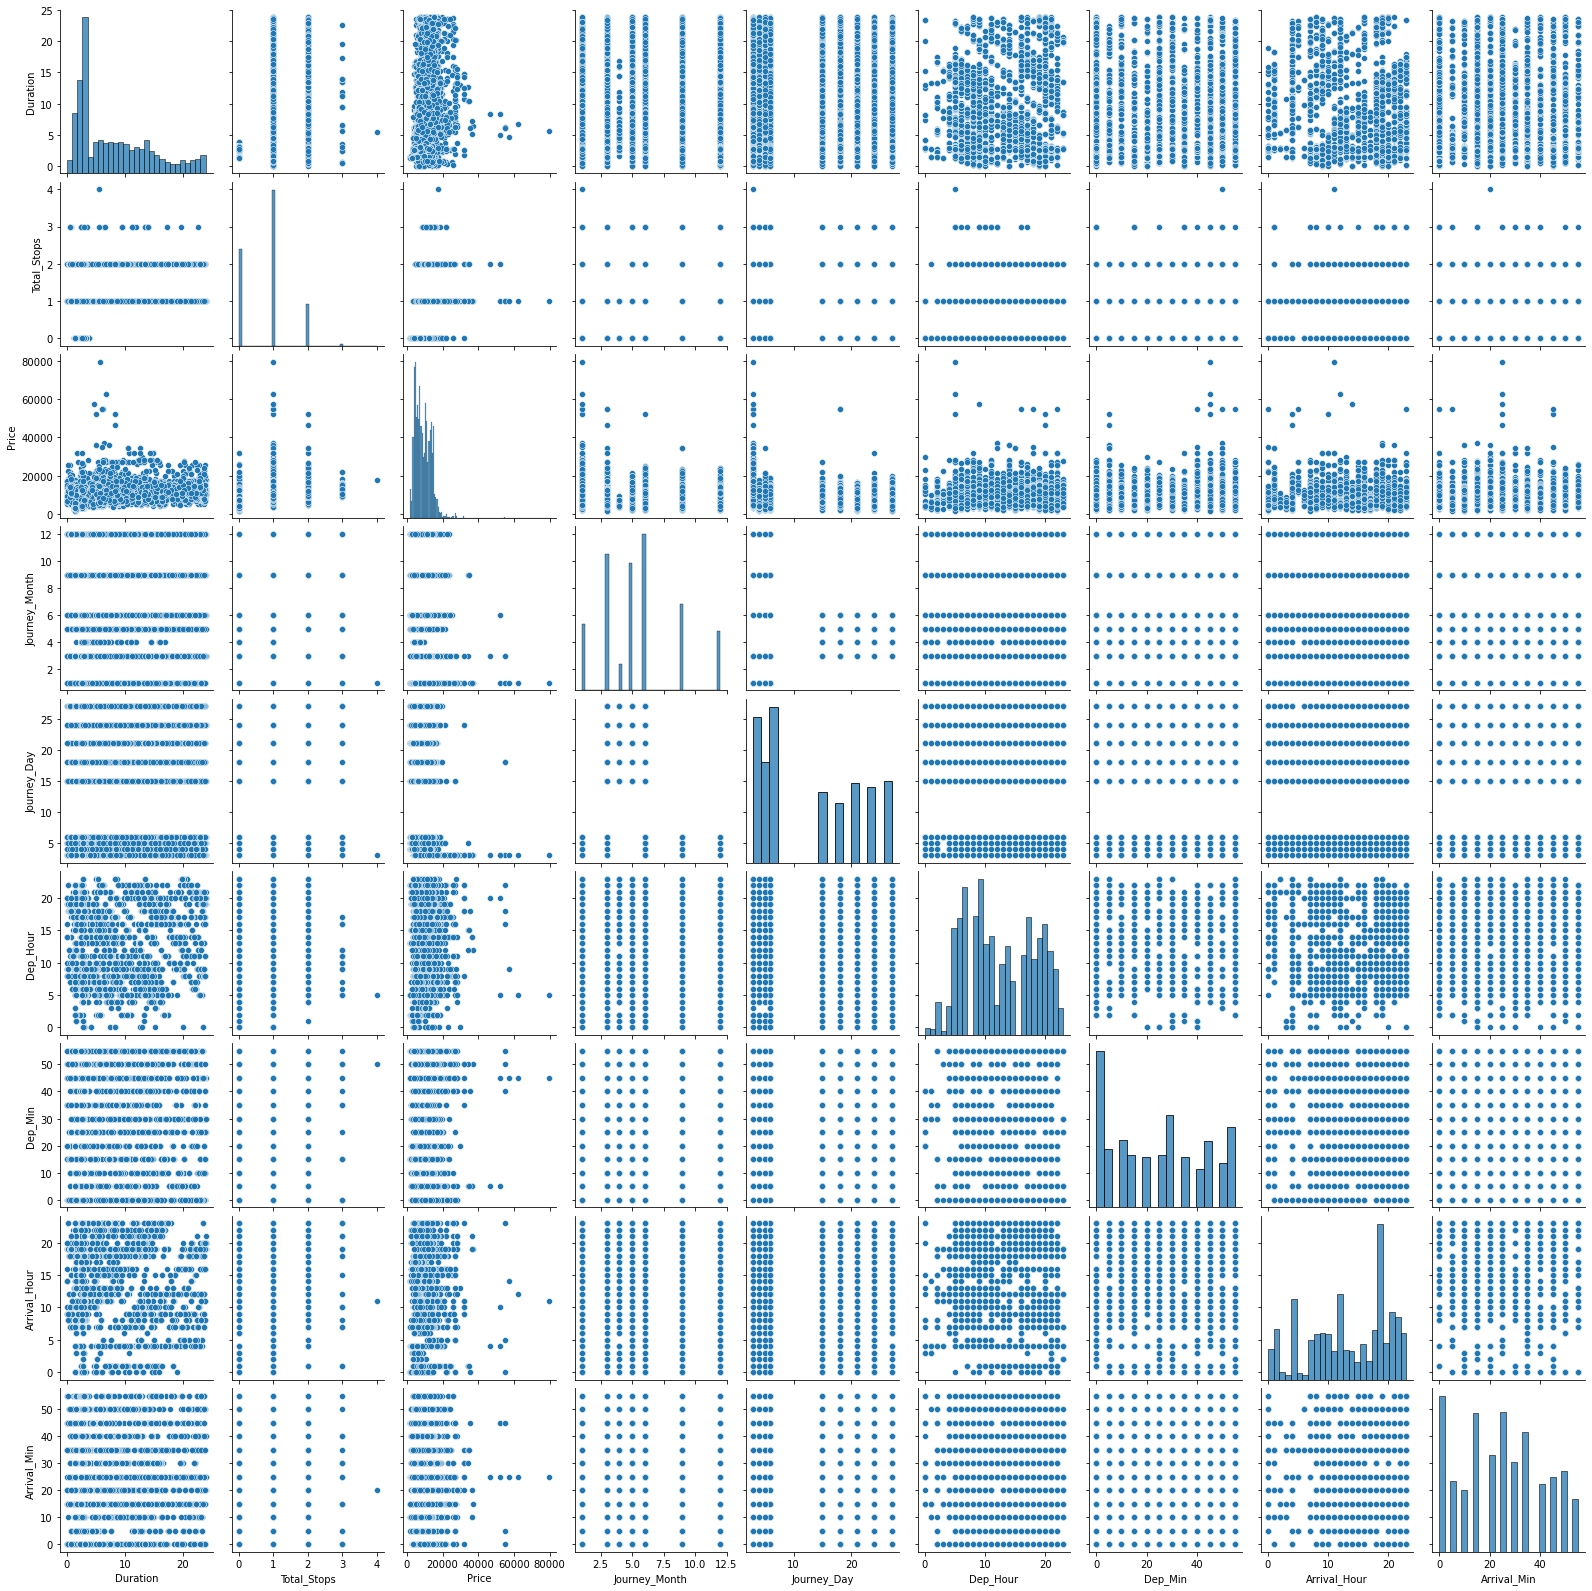

In [41]:
sns.pairplot(df)

    In the pair plots there is no linear relation between the columns. Can observe presence of outliers in the Price column.

**Checking for outliers:**

Duration            AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total_Stops      AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Price             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Journey_Month    AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Journey_Day      AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Dep_Hour            AxesSubplot(0.125,0.593621;0.133621x0.130172)
Dep_Min          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Arrival_Hour      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Arrival_Min      AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

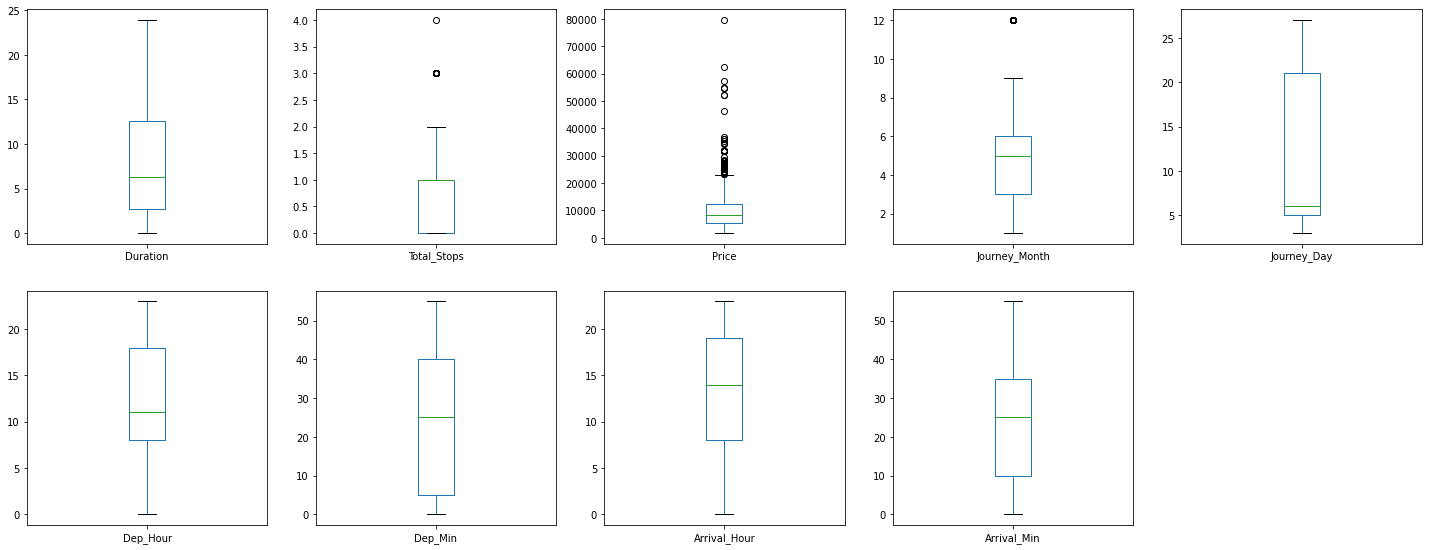

In [42]:
# to check outliers in the dataset
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(25,25))

* There are outliers in Total_Stops,Price and Journey_Month.
* Price has many outliers but outliers from this column will not be removed as it is target column.
* Total_Stops is a categorical column So no need to remove outliers in it.

**Removing Outliers:**

**IQR method:**

In [43]:
#Features having outliers
features=df[['Journey_Month']]

In [44]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [45]:
#Checking shape of new dataset
df_1.shape

(9726, 14)

In [46]:
#Checking dataloss in IQR method
Dataloss = (((10683-9726)/10683)*100)
Dataloss

8.958157820836844

In IQR method the data loss is less than 10% so i can use IQR method to remove outliers.

**Checking for skewness:**

In [47]:
#Checking for skewness
df_1.skew()

Duration         0.851356
Total_Stops      0.315096
Price            1.892394
Journey_Month    0.179871
Journey_Day      0.205870
Dep_Hour         0.123756
Dep_Min          0.177822
Arrival_Hour    -0.374118
Arrival_Min      0.111059
dtype: float64

skewness can be observed in Duration and Price.

Since Price is target column,removing skewness will manipulate the output. so, sknewness will not be removed.

In [48]:
#Creating a list of skewed features
fea=["Duration"]

In [49]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [50]:
df_1[fea] = scaler.fit_transform(df_1[fea].values)

In [51]:
#Checking skewness again
df_1[fea].skew()

Duration    0.000721
dtype: float64

**Label Encoding:**

In [52]:
# Separating categorical columns in df_1
cat_col=[]
for i in df_1.dtypes.index:
    if df_1.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [53]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_1[cat_col]= df_1[cat_col].apply(LE.fit_transform)

In [54]:
df_1[cat_col].head()

,Airline,Source,Destination,Route,Additional_Info
0,3,0,2,16,6
1,1,3,0,78,6
2,4,2,1,112,6
4,3,0,2,27,6
5,6,3,0,58,6


**Checking correlation using heat map:**

In [55]:
df_1.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.011183,0.060652,0.017397,-0.028970,-0.172712,-0.146616,0.020880,0.008746,0.025750,-0.024661,-0.067040,-0.014642,-0.083493
Source,-0.011183,1.000000,-0.428689,0.385694,0.067225,0.189680,-0.042452,0.010360,0.071145,0.009863,0.064645,-0.045119,0.023022,0.018436
Destination,0.060652,-0.428689,1.000000,-0.210140,-0.392358,-0.425690,0.076846,-0.263846,-0.072687,0.003989,-0.087151,0.091917,-0.059000,0.006345
Route,0.017397,0.385694,-0.210140,1.000000,0.338264,0.470162,0.017851,0.170346,0.131410,0.076424,-0.074617,-0.054603,0.016679,-0.177685
Duration,-0.028970,0.067225,-0.392358,0.338264,1.000000,0.621815,-0.129913,0.474787,0.064575,-0.022784,-0.031530,-0.041839,0.011640,-0.151809
Total_Stops,-0.172712,0.189680,-0.425690,0.470162,0.621815,1.000000,-0.083619,0.596254,0.076029,-0.022166,-0.060973,-0.007590,0.040415,-0.108505
Additional_Info,-0.146616,-0.042452,0.076846,0.017851,-0.129913,-0.083619,1.000000,-0.042563,-0.018736,-0.036811,-0.043188,-0.007537,0.030537,0.041405
Price,0.020880,0.010360,-0.263846,0.170346,0.474787,0.596254,-0.042563,1.000000,0.013499,-0.175841,0.007035,-0.030633,0.021683,-0.083728
Journey_Month,0.008746,0.071145,-0.072687,0.131410,0.064575,0.076029,-0.018736,0.013499,1.000000,-0.117084,0.015338,-0.027075,-0.012621,-0.046453
Journey_Day,0.025750,0.009863,0.003989,0.076424,-0.022784,-0.022166,-0.036811,-0.175841,-0.117084,1.000000,0.006146,-0.006040,-0.000101,-0.019700


To get better visualization on the correlation of features,let's plot it using heat map.

<AxesSubplot:>

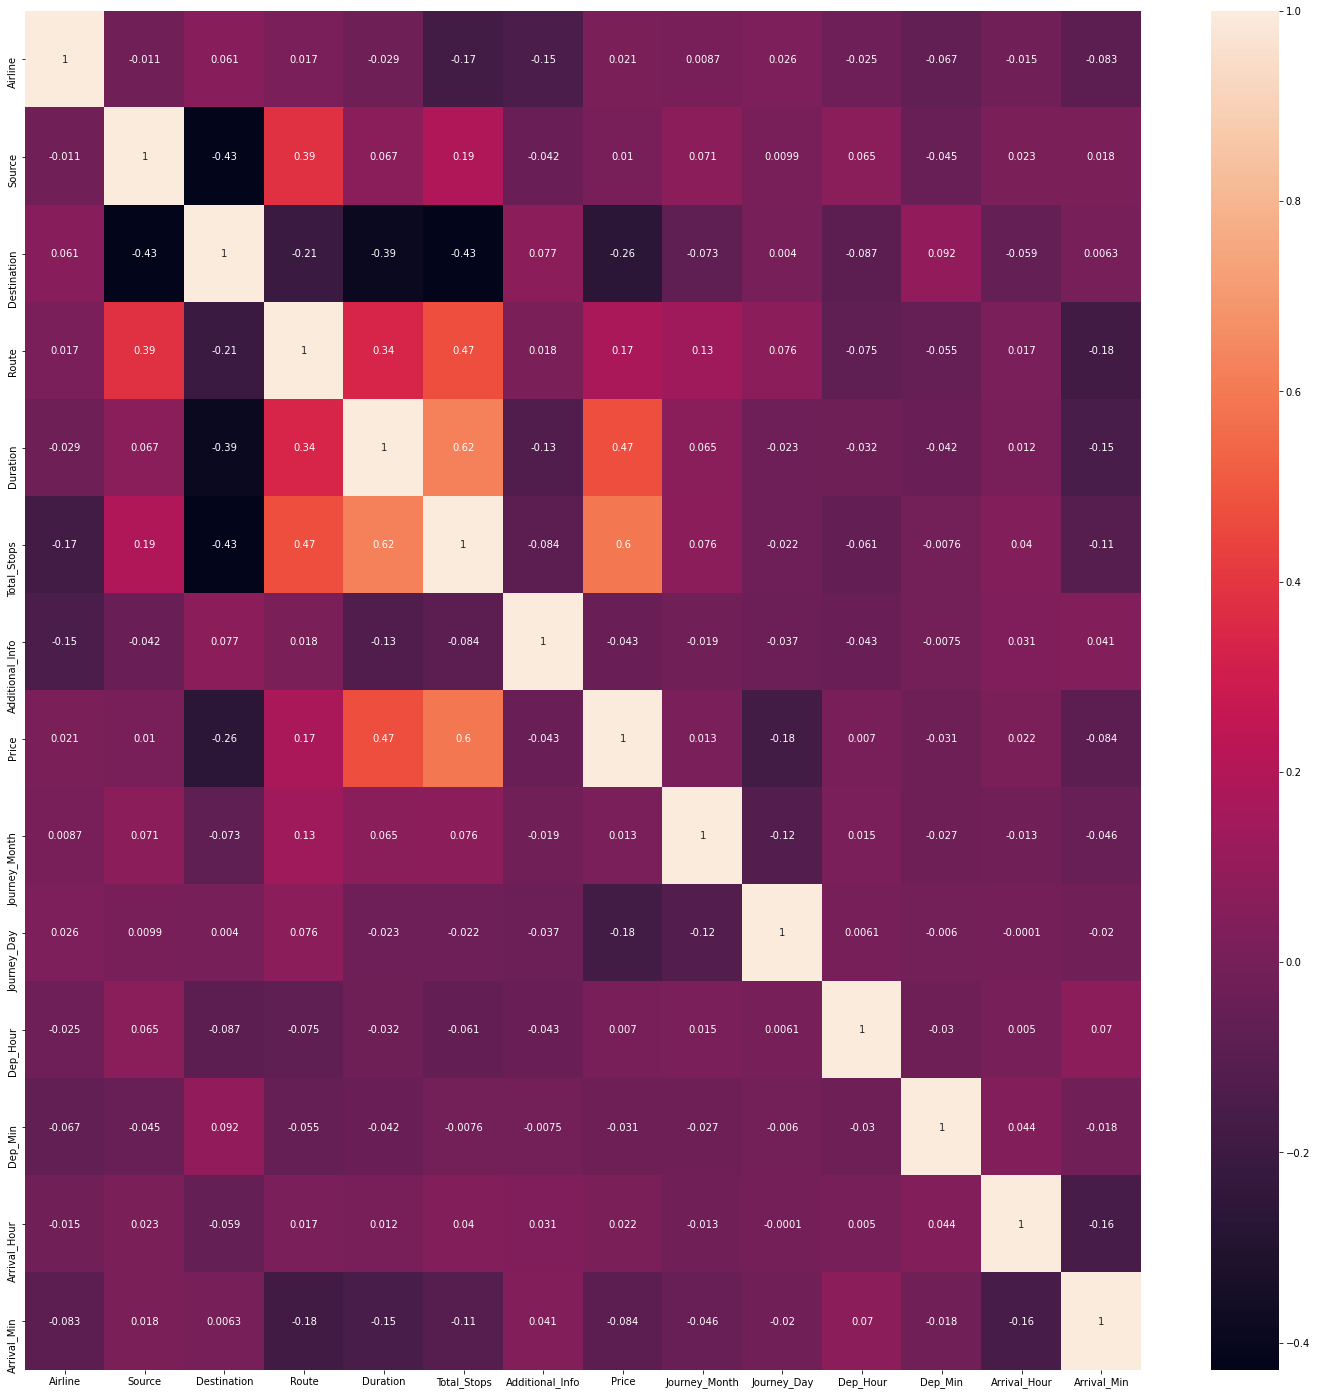

In [56]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,25))
sns.heatmap(df_1.corr(),color ='k',annot=True)

* There is no multicolinearity issue in any features.
* With target column(Price) Duration and total stops is higly correlated.
* Dep_Hour is very less correlated with target column(Price).

**ii) Test dataset:**

In [57]:
#to check test dataset
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [58]:
# to Check shape of test dataset
df1.shape

(2671, 10)

In [59]:
# to Check all column names
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [60]:
# to Check the info about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


There are 2671 rows and 10 columns in the dataset. All are of object data type. There are no null values in the dataset.

In [61]:
# to Check unique values of each column
df1.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

In [62]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df1.columns:
        print(df1[i].value_counts())
        print('****************************************')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
****************************************
9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
24/03/2019     78
1/04/2019      78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/05/2019     65
27/03/2019     65
3/03/2019      62
1/05/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2019  

**Feature Extraction:**

In [64]:
# to Convert object data type to datetime 
df1['Date_of_Journey'] =  pd.to_datetime(df1['Date_of_Journey'])
df1['Dep_Time'] =  pd.to_datetime(df1['Dep_Time'])
df1['Arrival_Time'] =  pd.to_datetime(df1['Arrival_Time'])

In [65]:
# to Check the data types of all columns again
df1.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

In [66]:
# to Extract journey year,month and day from Date_of_journey

# to Extract year
df1["Journey_Year"]=pd.to_datetime(df1.Date_of_Journey, format="%d/%m/%Y").dt.year

# to Extract month
df1["Journey_Month"]=pd.to_datetime(df1.Date_of_Journey, format="%d/%m/%Y").dt.month

# to Extract day
df1["Journey_Day"]=pd.to_datetime(df1.Date_of_Journey, format="%d/%m/%Y").dt.day

In [67]:
# to Drop Date_of_journey column after extraction
df1 = df1.drop(["Date_of_Journey"],axis=1)

The Duration column is the difference between Arrival_time and Dep_time.However, the Duration column is not in format (i.e.,-h-m) so let's extract proper duration column from the Arrival_time and Dep_time.

In [68]:
# to Extract Duration column using Arrival_Time and Dep_Time
Difference = (df1["Arrival_Time"]-df1["Dep_Time"])
Difference_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600
    Difference_list.append(duration)
df1["Duration"] = Difference_list

In [69]:
# to Extract hours and minutes from Dep_time

# to Extract Hours
df1["Dep_Hour"]=pd.to_datetime(df1["Dep_Time"]).dt.hour

# to Extract mintues
df1["Dep_Min"]=pd.to_datetime(df1["Dep_Time"]).dt.minute

In [70]:
# to Drop Dep_Time column after extraction
df1 = df1.drop(["Dep_Time"],axis=1)

In [71]:
# to Extract hours and minutes from Arrival_Time

# to Extract Hours
df1["Arrival_Hour"]=pd.to_datetime(df1["Arrival_Time"]).dt.hour

# to Extract mintues
df1["Arrival_Min"]=pd.to_datetime(df1["Arrival_Time"]).dt.minute

In [72]:
# to Drop Arrival_Time column after extraction
df1 = df1.drop(["Arrival_Time"],axis=1)

In [73]:
# to check dataset after extraction
df1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,non-stop,No info,2019,6,24,23,55,2,45


In [74]:
#to check the value counts now
for i in df1.columns:
        print(df1[i].value_counts())
        print('****************************************')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
****************************************
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
****************************************
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
****************************************
DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → 

Journey_Year column has only one entry i.e, 2019, since all the samples are of same year.It will not contribute to our model, so can drop this column.

In [75]:
# to Drop unnecessary column
df1 = df1.drop(["Journey_Year"],axis=1)

By looking into the categorical columns i can do grouping as follows.

In [76]:
#Grouping Airlines column
df1["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)

df1["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

df1["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [77]:
#Grouping Destination column
df1["Destination"].replace("New Delhi","Delhi",inplace=True)

In [78]:
#Grouping Additional_Info column
df1["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)

df1["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)

df1["Additional_Info"].replace("No Info","No info",inplace=True)

In [79]:
# to assign values for Total_Stops column
df1.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace = True)

In [80]:
# to check the dataset
df1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,0,No info,6,24,23,55,2,45


In [81]:
#Checking  satistical description of data set
df1.describe()

,Duration,Total_Stops,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,8.308187,0.833396,5.607263,12.026956,12.603519,24.891426,13.585174,24.558218
std,6.331450,0.672315,3.042952,8.564408,5.686673,19.086522,7.040396,16.775436
min,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,2.833333,0.000000,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000
50%,6.500000,1.000000,5.000000,6.000000,12.000000,25.000000,15.000000,25.000000
75%,12.583333,1.000000,6.000000,21.000000,18.000000,45.000000,19.000000,35.000000
max,23.916667,4.000000,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000


**Checking for outliers:**

Duration            AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total_Stops      AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Journey_Month     AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Journey_Day      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Dep_Hour         AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Dep_Min             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Arrival_Hour     AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Arrival_Min       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
dtype: object

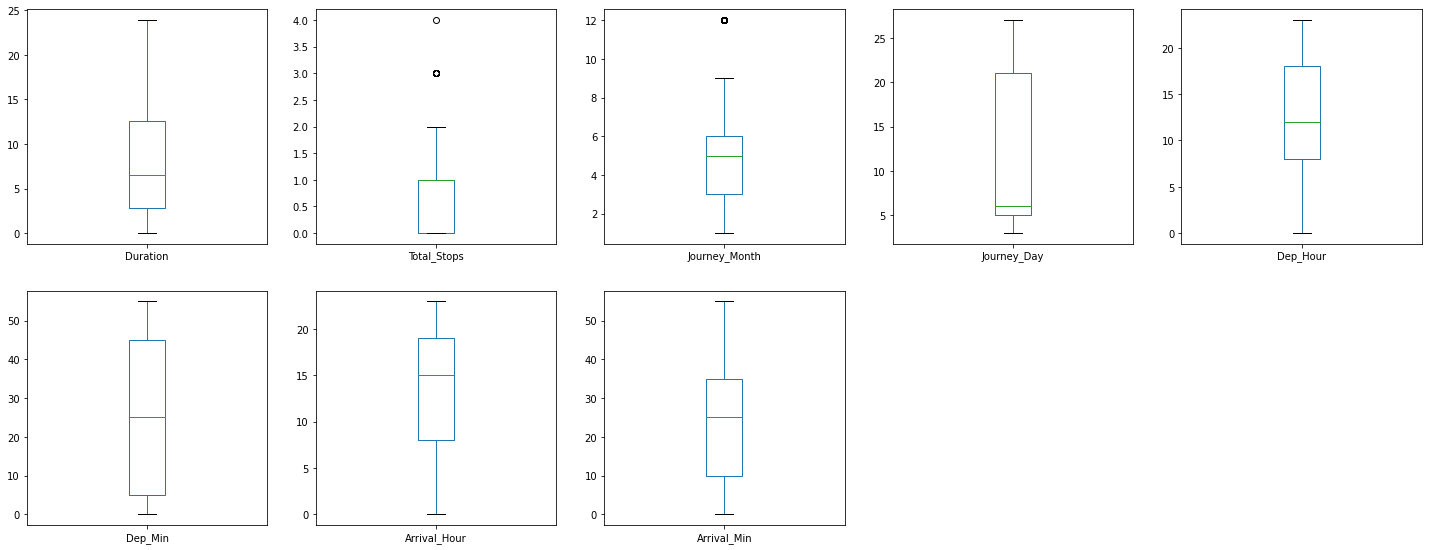

In [82]:
# to find out outliers in the dataset
df1.plot(kind='box',subplots=True,layout=(5,5),figsize=(25,25))

There are outliers in Total_Stops, Journey_Month and Total_Stops.
* since Total_Stops is a categorical column,outliers will not be removed in it.

**Removing Outliers:**

**IQR method:**

In [83]:
#Features having outliers
features=df1[['Journey_Month']]

In [84]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [85]:
#Checking shape of new dataset
df2.shape

(2414, 13)

In [86]:
#Checking dataloss in IQR method
Dataloss = (((2671-2414)/2671)*100)
Dataloss

9.621864470235867

In IQR method the data loss is less than 10% so i can use IQR method to remove outliers.

**Checking for skewness:**

In [87]:
#Checking for skewness
df2.skew()

Duration         0.812134
Total_Stops      0.327634
Journey_Month    0.156564
Journey_Day      0.310730
Dep_Hour         0.107732
Dep_Min          0.126943
Arrival_Hour    -0.444721
Arrival_Min      0.096564
dtype: float64

In [88]:
#Creating a list of skewed features
fea=["Duration"]

In [89]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [90]:
df2[fea] = scaler.fit_transform(df2[fea].values)

skewness removed.

In [91]:
#Checking skewness again
df2[fea].skew()

Duration   -0.01338
dtype: float64

In [92]:
# Separating categorical columns in df2
cat_col=[]
for i in df2.dtypes.index:
    if df2.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [93]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df2[cat_col]= df2[cat_col].apply(LE.fit_transform)

In [94]:
df2[cat_col].head()

,Airline,Source,Destination,Route,Additional_Info
0,4,2,1,70,5
2,4,2,1,70,2
3,5,2,1,70,5
4,0,0,2,14,5
7,3,3,0,52,5


**Checking correlation using heat map:**

In [95]:
df2.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.025743,0.073316,0.006619,-0.055145,-0.192535,-0.149410,-0.002283,0.007439,0.009846,-0.059759,-0.015035,-0.108238
Source,-0.025743,1.000000,-0.389236,0.330589,0.051402,0.183536,-0.036250,0.044850,-0.025131,0.069805,-0.049378,0.003893,-0.022964
Destination,0.073316,-0.389236,1.000000,-0.229631,-0.406966,-0.433933,0.083267,-0.050412,0.020449,-0.071824,0.104231,-0.035278,0.020444
Route,0.006619,0.330589,-0.229631,1.000000,0.360363,0.484534,0.040619,0.129223,0.040341,-0.123306,-0.036332,-0.000204,-0.225181
Duration,-0.055145,0.051402,-0.406966,0.360363,1.000000,0.633328,-0.121802,0.066728,-0.052472,-0.082031,-0.036776,-0.013730,-0.167460
Total_Stops,-0.192535,0.183536,-0.433933,0.484534,0.633328,1.000000,-0.069234,0.084167,-0.038463,-0.102686,-0.003003,0.034922,-0.118665
Additional_Info,-0.149410,-0.036250,0.083267,0.040619,-0.121802,-0.069234,1.000000,0.033281,-0.041788,-0.062081,0.019532,0.011078,0.022466
Journey_Month,-0.002283,0.044850,-0.050412,0.129223,0.066728,0.084167,0.033281,1.000000,-0.111535,-0.029400,-0.009782,0.010870,-0.026181
Journey_Day,0.007439,-0.025131,0.020449,0.040341,-0.052472,-0.038463,-0.041788,-0.111535,1.000000,-0.011166,-0.021626,0.017975,-0.017399
Dep_Hour,0.009846,0.069805,-0.071824,-0.123306,-0.082031,-0.102686,-0.062081,-0.029400,-0.011166,1.000000,-0.041386,-0.000559,0.068546


<AxesSubplot:>

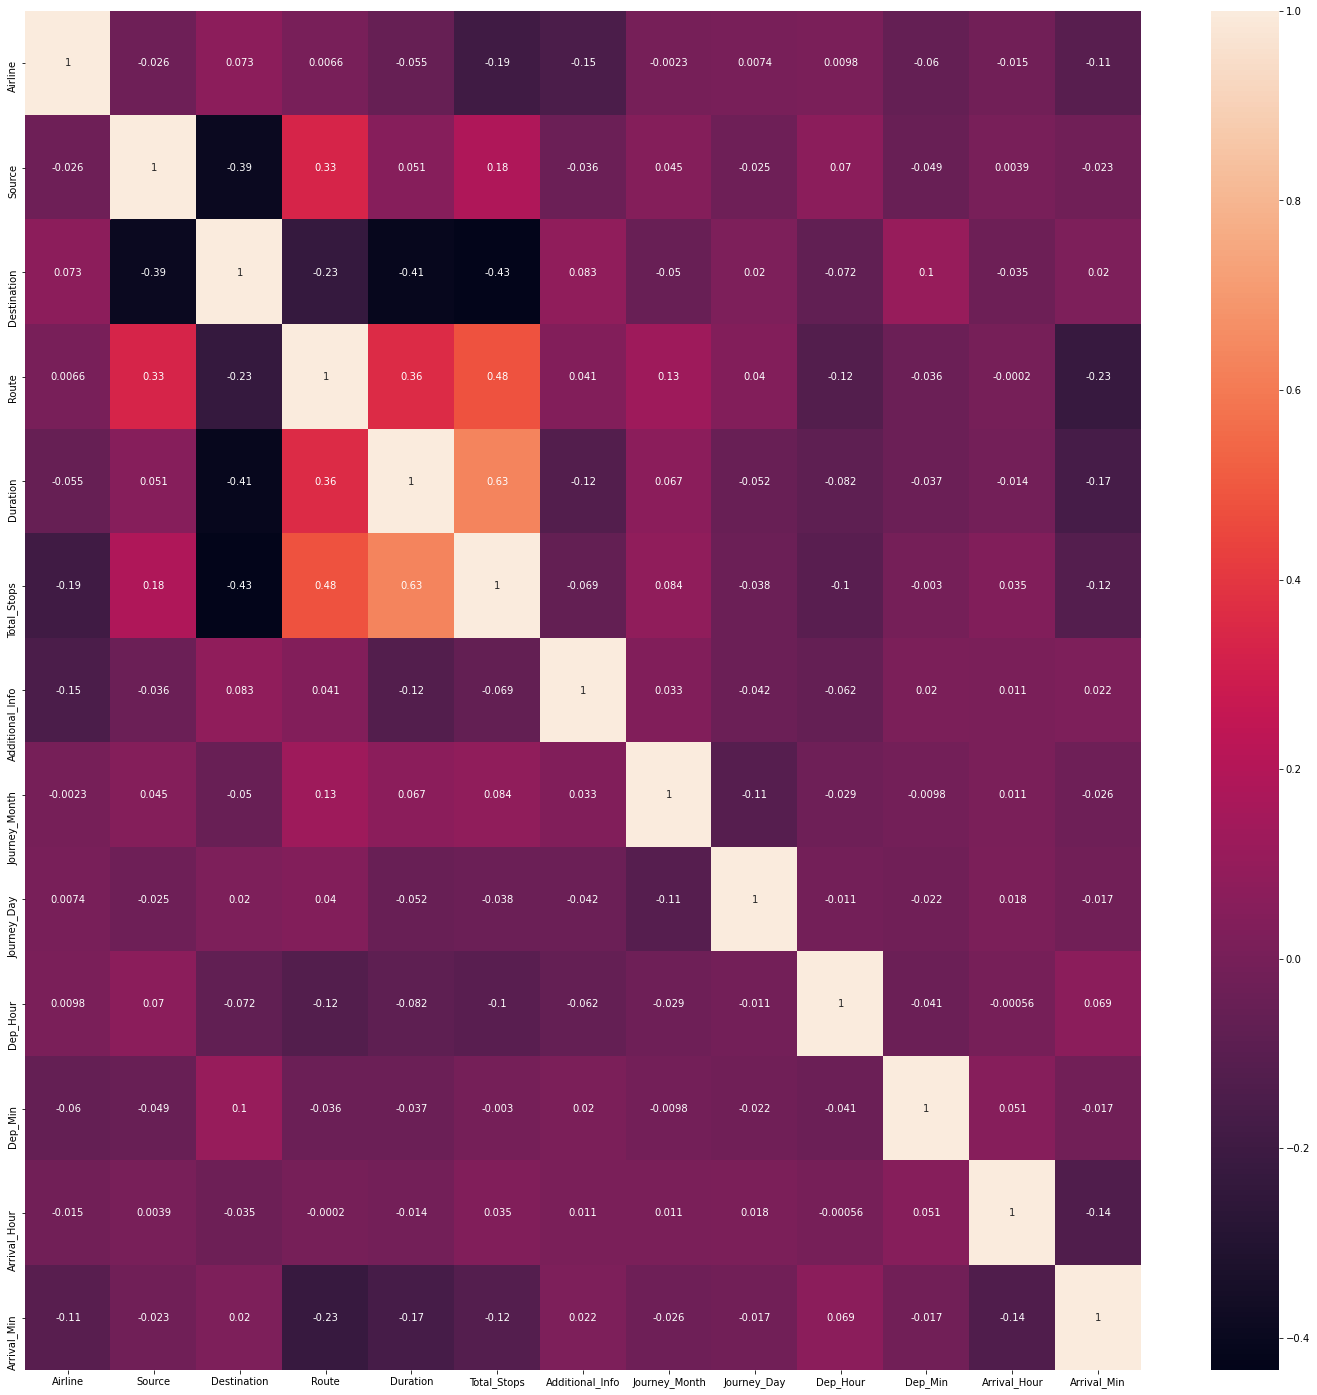

In [96]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,25))
sns.heatmap(df2.corr(),color ='k',annot=True)

* no column is showing high correlation with each other.
* Total_ stop, Duration and Route have more positive correlation compare to other columns.

**Scaling the data using standard scaler:**

In [97]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_1 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

In [98]:
X_1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.243561,0.042047,-0.184755,0.784578,0.679728,0.258811,0.463204,0.460712,-0.778303,0.787794,0.270961,-1.357442,0.016725
1,0.243561,0.042047,-0.184755,0.784578,1.735062,0.258811,-2.246426,0.031473,0.948874,1.140228,-0.512706,0.768368,-1.467637
2,0.825697,0.042047,-0.184755,0.784578,0.909146,0.258811,0.463204,0.031473,0.948874,-0.798160,-1.296373,1.051809,-1.467637
3,-2.084982,-1.649655,0.845266,-1.413788,-0.885227,-1.228737,0.463204,0.460712,1.294310,1.845097,1.577073,-1.640883,1.204215
4,-0.338574,0.887898,-1.214777,0.077960,-0.221330,0.258811,0.463204,-1.685484,-0.893448,0.435360,-0.512706,0.910089,0.313598


**Checking for multicolinearity issue using VIF:**

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

,vif_Features,Features
0,1.108317,Airline
1,1.353865,Source
2,1.540213,Destination
3,1.582325,Route
4,1.873648,Duration
5,2.150076,Total_Stops
6,1.068353,Additional_Info
7,1.032979,Journey_Month
8,1.028633,Journey_Day
9,1.048960,Dep_Hour


There is no multicolinearity issue in this dataset.

**MODEL BUILDING FROM TRAIN DATASET:**

In [100]:
x = df_1.drop("Price",axis=1)
y = df_1["Price"]

**Scaling the data using standard scaler:**

In [101]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [102]:
X.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,-0.341739,-1.669916,0.813802,-1.561573,-0.848535,-1.215953,0.504758,-0.825893,1.190880,1.662506,-0.225703,-1.789294,-0.887038
1,-1.459531,0.906072,-1.178405,0.206403,0.232876,1.748418,0.504758,-1.695886,-0.948377,-1.295187,1.375647,-0.048504,-0.584070
2,0.217157,0.047409,-0.182302,1.175939,1.420381,1.748418,0.504758,1.784083,-0.835785,-0.599259,0.041189,-1.354097,0.021868
3,-0.341739,-1.669916,0.813802,-1.247899,-0.290740,0.266233,0.504758,-1.695886,-1.173562,0.618614,1.375647,1.112022,0.627805
4,1.334949,0.906072,-1.178405,-0.363911,-1.006944,-1.215953,0.504758,0.479095,1.190880,-0.599259,-1.293269,-0.338636,0.021868


**Checking for multicolinearity issue using VIF:**

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.095758,Airline
1,1.484266,Source
2,1.595172,Destination
3,1.621352,Route
4,1.802938,Duration
5,2.099914,Total_Stops
6,1.063287,Additional_Info
7,1.039366,Journey_Month
8,1.031428,Journey_Day
9,1.032383,Dep_Hour


There is no multicolinearity issue in this dataset.

**Finding Best Random State and Accuracy:**

In [104]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [105]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9104247129980755  on Random_state  141


In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

In [107]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

**i) RandomForestRegressor:**

In [243]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9118183804618438
mean_squared_error: 1810324.662497921
mean_absolute_error: 655.5630093732042
root_mean_squared_error: 1345.4830591642249


**ii) ExtraTreeRegressor:**

In [244]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9066037650106451
mean_squared_error: 1917378.1165645372
mean_absolute_error: 649.0682402330364
root_mean_squared_error: 1384.6942321554377


**iii) Gradient Boosting:**

In [245]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8191260133695207
mean_squared_error: 3713252.7222387022
mean_absolute_error: 1279.4699534688002
root_mean_squared_error: 1926.9802080557813


**iv) DecisionTreeRegressor:**

In [246]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.834154134277383
mean_squared_error: 3404732.896304547
mean_absolute_error: 727.1144048435002
root_mean_squared_error: 1845.1918318441978


**v) XGB Regressor:**

In [108]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8978698180732748
mean_squared_error: 2096681.6905347125
mean_absolute_error: 766.7195644993093
root_mean_squared_error: 1447.9922964348646


**Cross Validation Score:**

In [247]:
print(cross_val_score(RFR,X,y,cv=5).mean())

0.8868753483978177


In [248]:
print(cross_val_score(ETR,X,y,cv=5).mean())

0.8928321405796723


In [249]:
print(cross_val_score(GBR,X,y,cv=5).mean())

0.810894584581167


In [250]:
print(cross_val_score(DTR,X,y,cv=5).mean())

0.8084074970716519


In [109]:
print(cross_val_score(XGB,X,y,cv=5).mean())

0.8931060434463524


**Hyper Parameter Tuning:**


In [112]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [113]:
# parameter of XGBRegresssor
parameter = {'gamma':np.arange(0,0.5,0.1),
             'n_estimators':[10,100,1000],
             'max_depth': [2,4,6,8,10],
              'n_jobs':[-2,-1,1,2]}

In [114]:
GCV=GridSearchCV(XGBRegressor(verbosity=0),parameter,cv=5)

In [115]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...lta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                    

In [116]:
GCV.best_params_

{'gamma': 0.0, 'max_depth': 6, 'n_estimators': 100, 'n_jobs': -2}

In [117]:
Best_mod=XGBRegressor(gamma=0.0,max_depth=6,n_estimators=100,n_jobs=-2)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 89.78698180732748
mean_squared_error: 2096681.6905347125
mean_absolute_error: 766.7195644993093
RMSE value: 1447.9922964348646


**Saving the model:**

In [118]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"Flight_Price.pkl")

['Flight_Price.pkl']

**Predicting Flight Price for test dataset using Saved model of trained dataset:**

In [119]:
# Loading the saved model
model=joblib.load("Flight_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([14666.968 ,  9372.992 ,  4057.144 , ...,  6701.6646,  5325.328 ,
       10362.227 ], dtype=float32)

In [120]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917
Predicted,14666.967773,9372.992188,4057.144043,6771.487305,6165.588379,10997.473633,11889.890625,6244.836914,10815.638672,7631.388672,...,13589.700195,14658.829102,2716.795166,13816.366211,17292.197266,5857.026855,4999.969238,6701.664551,5325.328125,10362.226562
Actual,14781.000000,8372.000000,3540.000000,5704.000000,5438.000000,11150.000000,12273.000000,5761.000000,10844.000000,7690.000000,...,14588.000000,14714.000000,2754.000000,13885.000000,17471.000000,6347.000000,4995.000000,4959.000000,6015.000000,9103.000000
